In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
ab_df =pd.read_csv("/content/antibody.csv")
ab_df['seqtype'] = 'Antibody'
ag_df =pd.read_csv("/content/antigen.csv")
ag_df['seqtype'] = 'Antigen'

In [7]:
seq_df = pd.concat([ab_df[['ab_seq','seqtype']].rename(columns = {'ab_seq':'seq'}),ag_df[['ag_seq','seqtype' ]].rename(columns = {'ag_seq':'seq'})],axis =0)
seq_df

,seq,seqtype
0,QVQLVESGGGVVQPGRSLRVSCVASGFMFSNYAMHWVRQTAGKGLE...,Antibody
1,EVQLVESGPGVMKPSETLSLICAVSGDTISSPYYFWSWVRQPRGKG...,Antibody
2,QVQLQESGPGVVKPSETLSLTCGVSGGTISSSHFYWSWIRQPPGKG...,Antibody
3,QVQLVESGPGVVKPSETLSLTCVVSGGTPGRGFLYWSWVRQPPGKG...,Antibody
4,QVQLQESGPGLVKPSETLSVTCSVSGDSMNNYYWTWIRQSPGKGLE...,Antibody
...,...,...
1747,MRVKETQMTWPNFWKWGTLILGLVIMCSASDKLWVTVYYGVPVWRD...,Antigen
1748,MRVKETQTNWPNLWKWGTLILGLVIICSASENLWVTVYYGVPVWRD...,Antigen
1749,MRVKEIQMNWPNLWKWGTLILGLVIICSASDNLWVTVYYGVPVWKD...,Antigen
1750,MRVKETQMNWPNLWKWGTLILGLVIICSASDNLWVTVYYGVPVWRD...,Antigen


In [9]:
seq_df['seq_len'] = seq_df['seq'].str.len()
seq_df

,seq,seqtype,seq_len
0,QVQLVESGGGVVQPGRSLRVSCVASGFMFSNYAMHWVRQTAGKGLE...,Antibody,215
1,EVQLVESGPGVMKPSETLSLICAVSGDTISSPYYFWSWVRQPRGKG...,Antibody,231
2,QVQLQESGPGVVKPSETLSLTCGVSGGTISSSHFYWSWIRQPPGKG...,Antibody,235
3,QVQLVESGPGVVKPSETLSLTCVVSGGTPGRGFLYWSWVRQPPGKG...,Antibody,238
4,QVQLQESGPGLVKPSETLSVTCSVSGDSMNNYYWTWIRQSPGKGLE...,Antibody,458
...,...,...,...
1747,MRVKETQMTWPNFWKWGTLILGLVIMCSASDKLWVTVYYGVPVWRD...,Antigen,856
1748,MRVKETQTNWPNLWKWGTLILGLVIICSASENLWVTVYYGVPVWRD...,Antigen,853
1749,MRVKEIQMNWPNLWKWGTLILGLVIICSASDNLWVTVYYGVPVWKD...,Antigen,861
1750,MRVKETQMNWPNLWKWGTLILGLVIICSASDNLWVTVYYGVPVWRD...,Antigen,867


/tmp/ipython-input-3584101500.py:21: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(
/tmp/ipython-input-3584101500.py:21: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(


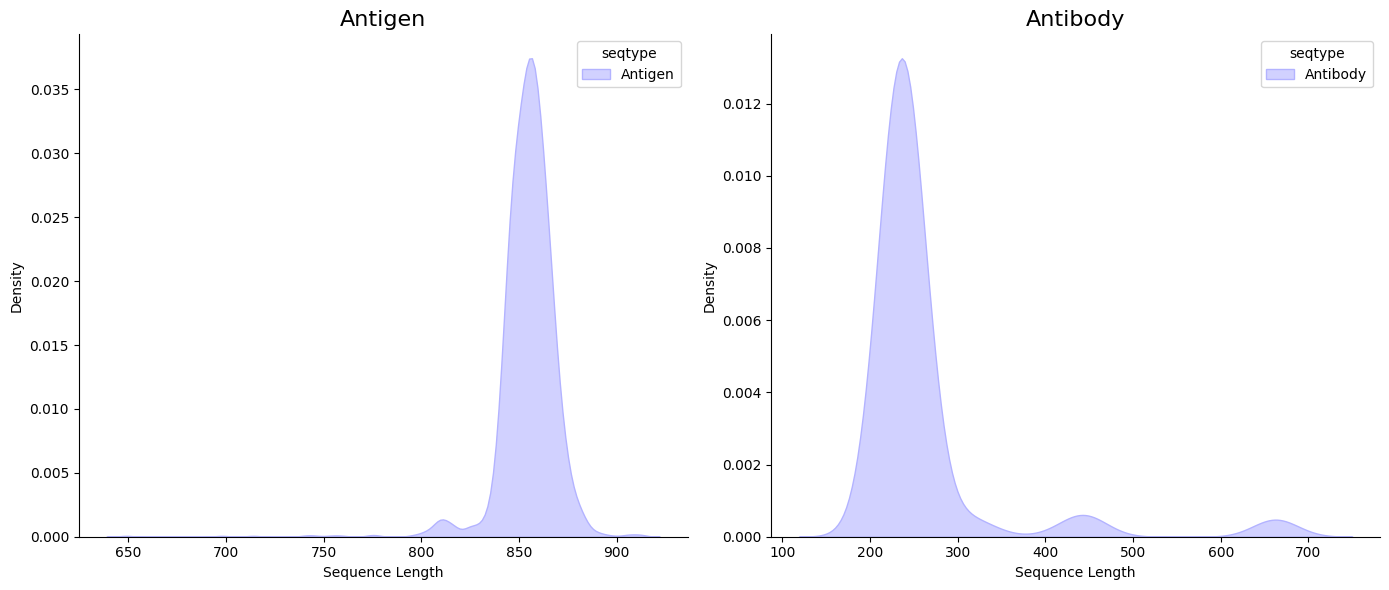

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Prepare Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Let's define a simpler palette or let Seaborn handle it automatically
# to avoid the "Missing Keys" error.
# If you want specific colors, ensure the keys match your 'seqtype' values exactly.
custom_palette = ["#b3b3ff", "#ffcc00"]

seq_types = ['Antigen', 'Antibody']

for i, s_type in enumerate(seq_types):
    # Filter data for the specific panel (Left for Antigen, Right for Antibody)
    subset = seq_df[seq_df['seqtype'] == s_type]

    # Check if subset is empty to avoid errors
    if not subset.empty:
        sns.kdeplot(
            data=subset,
            x="seq_len",
            # If you have another column that defines the 'two categories'
            # within Antigen/Antibody, put that column name here.
            # If you don't have one, remove the hue parameter entirely.
            hue="seqtype",
            fill=True,
            common_norm=False,
            palette=custom_palette,
            alpha=0.6,
            ax=axes[i]
        )

    axes[i].set_title(s_type, fontsize=16)
    axes[i].set_xlabel("Sequence Length")
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

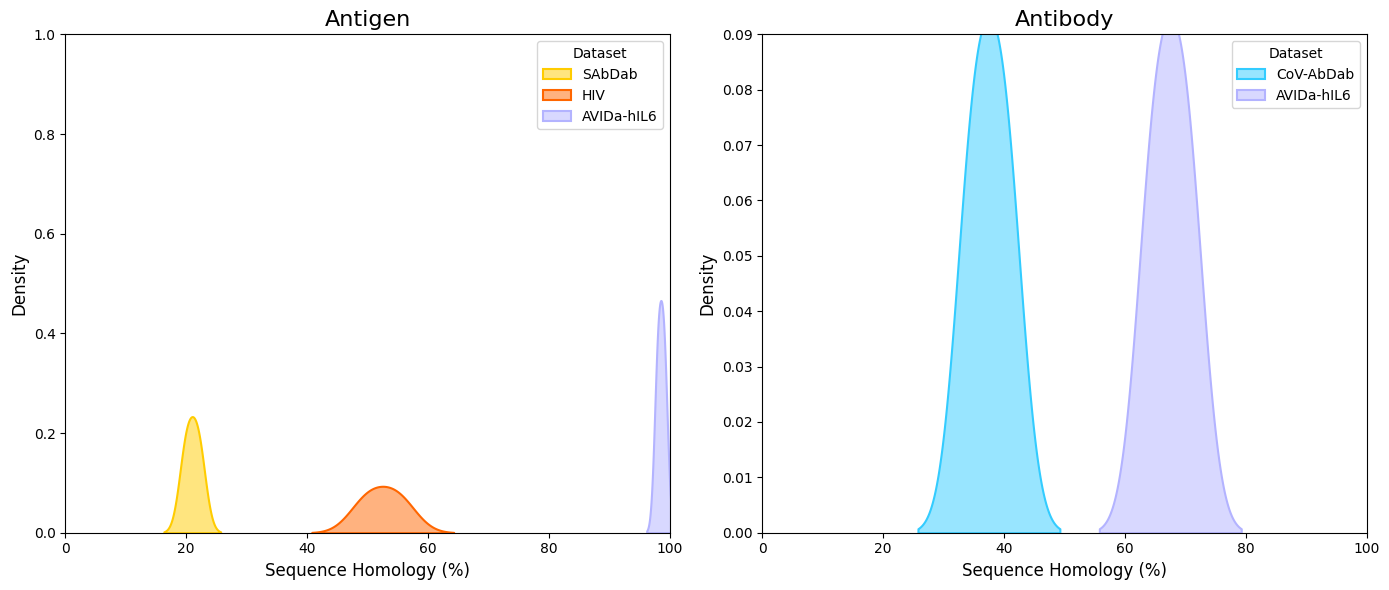

In [8]:

# 1. Prepare your data
# Your data should be in "long-form" format:
# One column for the homology value, one for the category (Dataset).
data = {
    'Homology': [20, 22, 50, 55, 98, 99, 35, 40, 65, 70], # Example values
    'Dataset': ['SAbDab', 'SAbDab', 'HIV', 'HIV', 'AVIDa-hIL6', 'AVIDa-hIL6', 'CoV-AbDab', 'CoV-AbDab', 'AVIDa-hIL6', 'AVIDa-hIL6'],
    'Type': ['Antigen', 'Antigen', 'Antigen', 'Antigen', 'Antigen', 'Antigen', 'Antibody', 'Antibody', 'Antibody', 'Antibody']
}
df = pd.DataFrame(data)

# 2. Setup the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Define the datasets to match your image colors
palette = {
    "AVIDa-hIL6": "#b3b3ff",
    "SAbDab": "#ffcc00",
    "HIV": "#ff6600",
    "CoV-AbDab": "#33ccff"
}

# 3. Create the plots
for i, p_type in enumerate(['Antigen', 'Antibody']):
    subset = df[df['Type'] == p_type]

    sns.kdeplot(
        data=subset,
        x="Homology",
        hue="Dataset",
        fill=True,
        common_norm=False, # Allows each curve to reach its own peak density
        palette=palette,
        alpha=0.5,
        linewidth=1.5,
        ax=axes[i]
    )

    # 4. Formatting
    axes[i].set_title(p_type, fontsize=16)
    axes[i].set_xlabel("Sequence Homology (%)", fontsize=12)
    axes[i].set_ylabel("Density", fontsize=12)
    axes[i].set_xlim(0, 100)

    # Matching the y-axis scales from your image
    if p_type == 'Antigen':
        axes[i].set_ylim(0, 1.0)
    else:
        axes[i].set_ylim(0, 0.09)

plt.tight_layout()
plt.show()